# Clustering Basics and Model Evaluation

Cluster analysis or clustering is the task of grouping unlabeled data, so that similar object belongs to the same cluster. This machine learning snippet shows how to use a cluster algorithm with the iris dataset and evaluate the cluster with an internal and external evaluation method. As cluster algorithm we use k-means in this example.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

from sklearn import cluster, datasets, manifold, metrics

Depending on the clustering algorithm we have to set some parameters. Here we use k-means clustering, so we have to specify the number of clusters we expect in the dataset.

In [2]:
iris = datasets.load_iris()

n_clusters = 3
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=100)
label = kmeans.fit_predict(iris.data)

We have the true and predicted clusters. So we can do a dimension reduction with MDS and plot both true and predicted clusters as scatter plot in a two dimensional space.

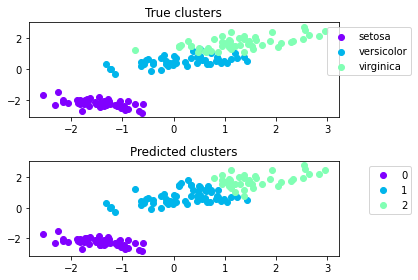

In [3]:
mds = manifold.MDS(n_components=2)
new_dim = mds.fit_transform(iris.data)

df = pd.DataFrame(new_dim, columns=['X', 'Y'])

fig = plt.figure()
n_true_clusters = 3

n = max(n_clusters, n_true_clusters)
colors = [cm.rainbow(i/(n + 1)) for i in range(n)]


ax = fig.add_subplot(211)
for i in range(n_true_clusters):
    plt.scatter(df[iris.target == i].X, df[iris.target == i].Y, color=colors[i], label=iris.target_names[i])

ax.set_title('True clusters')
plt.legend(bbox_to_anchor=(1.25, 1))

ax = fig.add_subplot(212)
for i in range(n_clusters):
    plt.scatter(df[label == i].X, df[label == i].Y, color=colors[i], label=i)

ax.set_title('Predicted clusters')
plt.legend(bbox_to_anchor=(1.25, 1))

fig.tight_layout()

Next we can evaluate how well the predicted clusters are separated with an internal criterion like the silhouette score. A good separation would result in a score of 1. 

In [4]:
silhouette_avg = metrics.silhouette_score(iris.data, label, metric='euclidean')
print(silhouette_avg)

0.5528190123564091


With a boxplot we can easily plot the silhouette score for every cluster. If we do not know the true cluster size, we could try to optimize silhouette score if we change the parameters for our cluster algorithm.

<AxesSubplot:xlabel='label', ylabel='score'>

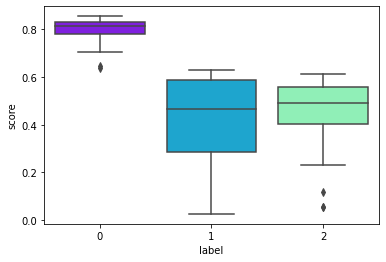

In [5]:
sample_silhouette_values = pd.DataFrame(metrics.silhouette_samples(iris.data, label), columns=['score'])
sample_silhouette_values['label'] = label

sns.boxplot(x="label", y="score", data=sample_silhouette_values, palette=colors)

But for the iris dataset we know the true clusters and we can evaluate the result with an external criterion. The adjusted rand score evaluates the cluster against the ground truth. A perfect match would result in a score of 1.

In [6]:
metrics.adjusted_rand_score(iris.target, label)

0.7302382722834697

In [7]:
metrics.adjusted_mutual_info_score(iris.target, label)

0.7551191675800483

In [8]:
metrics.accuracy_score(iris.target, label)

0.8933333333333333

After we have finished, we can user our fitted model to predict new values.

In [9]:
N = [[1.9,  3.2,  1.3,  0.1],
       [ 6.2,  3.1,  4.5,  1.6],
       [ 6.9,  3.3,  5.9,  2.3]]

kmeans.predict(N)

array([0, 1, 2], dtype=int32)